# PROJETO PORTFOLIO
# INVENTÁRIO FLORESTAL

## Briefing

Notebook com o estudo de caso dos cáclculos de um inventário florestal, a partir de um levantamento real.


## Objetivo

Detalhamento qualiquantitativo de uma floresta.


### Objetivos: Detalhamento

O objetivo principal é o <b>detalhamento qualiquantitativo de uma floresta</b>, visando gerar indicadores para o manejo adequado da floresta. O problema é então segmentado em alguns problemas/etapas de menor complexidade, que irão gerar seus resultados e serão finalmente agrupados para apresentação ao IBAMA - Instituto Brasileiro do Meio Ambiente (órgão regulador do manejo florestal no Brasil):

Os objetivos são assim 

1. Descrição quantitativa da floresta;

2. Parâmetros estatísticos da floresta;

3. Divisão da floresta por estágio sucessional de regeneração (Estágio inicial, médio e avançado);

4. Parâmetros estatísticos da floresta por estagio sucessional;

5. Cálculo dos Parâmetros Fitossociológicos por estágio sucessional (estrutura vertical e estrutura horizontal):
    
    
    5.1. Riqueza (S)
    5.2. Densidade Absoluta e Relativa
    5.3. Frequência Absoluta e Relativa
    5.4. Dominância Absoluta e Relativa
    5.5. IVI - Índice de Valor de Importância
    5.6. IVC - Índice de Valor de Cobertura
    5.7. Índice de Diversidade de Shannon-Weaver (H')
    5.8. Índice de diversidade de Pielou (J)
    5.9. Índice de Simpson (D)
    5.10. Diversidade Máxima (H' max)
    5.11. Coeficiente de Mistura de Jentsch(QM)
    5.12. Número de Hill (Nh)


6. Estimativa do volume de madeira, em metro cúbico (m³), por espécie e total (com intervalo de confiança)

7. Estimativa do volume de madeira empilhado, em estéreo (*st*), por espécie e total (com intervalo de confiança)

8. Geração da lista de espécies com volume estimado, segundo padrão SINAFLOR, exportável para csv.



## Condições

A coleta dos dados foi realizada em campo, através de uma equipe de três profissionais, que implantaram **42 parcelas**, de formato quadrangular, de **100 metros quadrados** (10m x 10m) em uma **floresta de 9,4 hectares totais**. A distribuição das parcelas na área foi feita considerando o método de amostragem aleatória simples, utilizando parcelas de área fixa.

A equipe de campo coletou o CAP (circunferência a 1,30 m de altura) de todas as árvores com mais de 12 cm de circunferência, mediu a altura de cada uma das árvores, e identificou sua espécie e/ou nome comum, fixando uma plaqueta metálica de identificação em cada uma das árvores e registrando a coordenada de localização (Coordenadas UTM X,Y) para cada parcela (unidade amostral).

Os dados foram coletados em campo, e passaram por etapa de transcrição e limpeza prévia, sendo armazenados em arquivo csv editado, limpo, com a revisão da nomenclatura das espécies e diâmetros de espécies bifurcadas equalizados/ajustados pela equipe técnica.

O dataset foi reduzido de forma a criar duas condições diferentes: uma com suficiência amostral atingida e outra com suficiência amostral não atingida. Isso foi feito para permitir a demonstração do comportamento do script em ambas as situações.

Foram omitidos alguns dados de identificação e localização para respeitar o acordo de confidencialidade com a empresa contratante.


## Referências Bibliográficas

São indicadas as seguintes referências quanto aos aspectos florestais (técnicos e teóricos) usados nesta solução:

XXXX
XXXX
XXXX

In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from math import pi
import matplotlib as plt
import seaborn as sns
from scipy import stats

### Parâmetros

alguns parâmetros são pré-estabelecidos a partir das características da área inventariada, ou oriundas do processo de amostragem, ou ainda como exigência do cliente ou órgão ambiental que avalia o inventário florestal.

Foram utilizadas aos parâmetros estatísticos mais utilizados com relação ao limite de erro e probabilidade, cujas referências e exigências podem variar de estado para estado, ou até de município para município, quando for o caso. 

A diferenciação entre uppercase e lowercase (maiúsculas e minúsculas) foi aplicada para se aproximar com os padrões (boas-práticas) dos demais inventários florestais produzidos pelos profissionais da área. 

In [2]:
# Área total da vegetação (em hectares)
A = 9.4
print(f'Área total (A): {A} hectares')

# Área individual das parcelas (em hectares)
a = (10 * 10)/10000
print(f'Área individual de cada parcela (a): {a} hectares')

# Número de parcelas instaladas em campo
n = 42
print(f'Número de parcelas alocadas (n): {n} parcelas')

# N. máximo de parcelas possíveis na área (N)
N = round(A/a)
print(f'Número máximo de parcelas possíveis na área (N): {N} parcelas')

# Área total amostrada, em hectares (ha)
ha = n*a
print(f'A área total amostrada é de: {ha} hectares')

# Nível de probabilidade (em percentual)
prob = 0.95
print(f'Nível de probabilidade requerido (prob): {prob*100}%')

# Nível de significância requerido (alpha)
signif = round(1 - prob, 2)
print(f'Nível de significância - alpha: {signif}')

# Limite de Erro (em percentual)
LE = 0.20
print(f'Limite de erro aceitável (LE): {LE*100}%')

# Graus de Liberdade (gl)
gl = n-1
print(f'Graus de Liberdade: {gl} ')

# Valor t de student para teste bicaudal (tabelado)
t_student = stats.t.ppf(1 - signif / 2, gl)
print(f'Valor "t" de student: {t_student}')

Área total (A): 9.4 hectares
Área individual de cada parcela (a): 0.01 hectares
Número de parcelas alocadas (n): 42 parcelas
Número máximo de parcelas possíveis na área (N): 940 parcelas
A área total amostrada é de: 0.42 hectares
Nível de probabilidade requerido (prob): 95.0%
Nível de significância - alpha: 0.05
Limite de erro aceitável (LE): 20.0%
Graus de Liberdade: 41 
Valor "t" de student: 2.0195409639828936


## Análise Exploratória e Tratamento dos Dados

In [3]:
data = pd.read_csv('dados_brutos_clean.csv')
data

,id,parcela,placa,familia,especie,especie_sem_autor,nome_comum,habito,ameaca_flora_brasileira,endemismo,cap,ht,coord_x,coord_y
0,1,1,2526.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,19,5.5,729754.298150,6.959150e+06
1,2,1,2512.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,17,6.0,729754.298150,6.959150e+06
2,3,1,2513.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,16,7.0,729754.298150,6.959150e+06
3,4,1,2514.0,APOCYNACEAE,Tabernaemontana catharinensis A.DC.,Tabernaemontana catharinensis,Cata-vento,Árvore,NE,não é endêmica do Brasil,13.5,4.0,729754.298150,6.959150e+06
4,5,1,2515.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,28,4.5,729754.298150,6.959150e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,655,42,3141.0,Peraceae,Pera glabrata (Schott) Poepp. ex Baill.,Pera glabrata,Tabocuva,Árvore,NE,não é endêmica do Brasil,19,7.0,729918.545927,6.959837e+06
655,656,42,3140.0,MYRTACEAE,Myrceugenia euosma (O.Berg) D.Legrand,Myrceugenia euosma,Guamirim,Árvore,NE,é endêmica do Brasil,22,13.0,729918.545927,6.959837e+06
656,657,42,3142.0,BIGNONIACEAE,Jacaranda puberula Cham.,Jacaranda puberula,Caroba,Árvore,LC,é endêmica do Brasil,19,8.0,729918.545927,6.959837e+06
657,658,42,3143.0,Peraceae,Pera glabrata (Schott) Poepp. ex Baill.,Pera glabrata,Tabocuva,Árvore,NE,não é endêmica do Brasil,13,7.0,729918.545927,6.959837e+06


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       659 non-null    int64  
 1   parcela                  659 non-null    int64  
 2   placa                    658 non-null    float64
 3   familia                  659 non-null    object 
 4   especie                  659 non-null    object 
 5   especie_sem_autor        659 non-null    object 
 6   nome_comum               659 non-null    object 
 7   habito                   659 non-null    object 
 8   ameaca_flora_brasileira  659 non-null    object 
 9   endemismo                659 non-null    object 
 10  cap                      659 non-null    object 
 11  ht                       659 non-null    float64
 12  coord_x                  659 non-null    float64
 13  coord_y                  659 non-null    float64
dtypes: float64(4), int64(2), o

> Tratamento 1
Homogeneizando a formatação dos campos de localização (coordenadas). Dados essenciais para a posterior geolocalização de cada amostra e para a criação de mapas georreferenciados (geoprocessamento).

In [5]:
data['coord_x'] = data['coord_x'].round(3)
data['coord_y'] = data['coord_y'].round(3)

In [6]:
data.head(15)

,id,parcela,placa,familia,especie,especie_sem_autor,nome_comum,habito,ameaca_flora_brasileira,endemismo,cap,ht,coord_x,coord_y
0,1,1,2526.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,19,5.5,729754.298,6959150.263
1,2,1,2512.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,17,6.0,729754.298,6959150.263
2,3,1,2513.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,16,7.0,729754.298,6959150.263
3,4,1,2514.0,APOCYNACEAE,Tabernaemontana catharinensis A.DC.,Tabernaemontana catharinensis,Cata-vento,Árvore,NE,não é endêmica do Brasil,13.5,4.0,729754.298,6959150.263
4,5,1,2515.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,28,4.5,729754.298,6959150.263
5,6,1,2516.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,21,4.5,729754.298,6959150.263
6,7,1,2517.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,15,5.0,729754.298,6959150.263
7,8,1,2518.0,LAURACEAE,Nectandra oppositifolia Nees,Nectandra oppositifolia,Canela-ferrugem,Árvore,NE,não é endêmica do Brasil,21,5.5,729754.298,6959150.263
8,9,1,2520.0,EUPHORBIACEAE,Alchornea triplinervia (Spreng.) Müll.Arg.,Alchornea triplinervia,Tanheiro,Árvore,NE,não é endêmica do Brasil,38,6.0,729754.298,6959150.263
9,10,1,2519.0,MELASTOMATACEAE,Tibouchina pulchra Cogn.,Tibouchina pulchra,Quaresmeira,Árvore,NE,é endêmica do Brasil,16,4.0,729754.298,6959150.263


> Tratamento 2:
A coluna 'cap' está apresentando dtype do tipo 'object', quando deveria ser 'float' ou 'int'.
Ela é fundamental, pois a criação da coluna 'dap' (diâmetro a altura do peito), um dos principais parâmetros de um inventário florestal, depende de um cálculo realizado a partir da variável 'cap'.

In [7]:
# A coluna deveria ter apenas dados numéricos (float64). 
# A primeira hipótese é que existam dados ou registros corrompidos no campo 'cap'. 
# Ao checar o dtype da 1ª linha (que possui um valor numérico), pode-se checar se a coluna possui toda o mesmo dtype
data.loc[[0],'cap']

0    19
Name: cap, dtype: object

Como todo o campo está com um dtype indesejável ('object'), deve-se encontrar em qual linha está o erro e posteriormente converter todo a coluna para float ('float64').

Por premissa técnica, sei que onde há erro, há o caracter "+" (Formato usado pela equipe de campo para registrar o CAP de árvores com mais de uma medida, e as duas sendo diferentes. Trata-se de um erro do pré-processamento).

Portanto, deve-se localizar o(s) índice(s) de onde aparece o caracter "+" para realizar o tratamento.

In [8]:
contain_plus = data['cap'].str.contains('\+')
df_with_plus = data[contain_plus]
print(df_with_plus)

      id  parcela   placa    familia      especie especie_sem_autor  \
366  367       29  3490.0  MYRTACEAE  Eugenia sp.       Eugenia sp.   

    nome_comum habito ameaca_flora_brasileira endemismo    cap   ht  \
366   Guamirim      -                       -         -  15+17  5.0   

        coord_x      coord_y  
366  729971.462  6959328.223  


O erro está somente no index 366 (cap = 15+17).

Como premissa técnica, o o pré-tratamento dos dados utilizou sempre o maior valor cap de cada célula. Ou seja, esta célula após o tratamento deveria constar apenas o valor "17".

Então será tratado o erro desta maneira.

In [9]:
data.loc[366, 'cap'] = 17
data.loc[[366], 'cap']

366    17
Name: cap, dtype: object

Finalmente, substituindo o tipo de dado da coluna 'cap' (de 'object' para 'float64') e verificando se a mudança surtiu efeito:

In [10]:
data['cap'] = data['cap'].astype(float)
data['cap'].dtype

dtype('float64')

> Tratamento 3: 
Criando a coluna 'dap' no dataframe, e já posicionando a coluna no local correto:

Verificando previamente o cálculo do 'dap' (Diâmetro à Altura do Peito) a partir da coluna 'cap' (Circunferência à Altura do Peito).

Não faz-se necessário reduzir as casas decimais, para se ter maior precisão.

In [11]:
dap_check = data['cap'] / pi
print(dap_check)
print(dap_check.max())
print(dap_check.min())

0      6.047888
1      5.411268
2      5.092958
3      4.297183
4      8.912677
         ...   
654    6.047888
655    7.002817
656    6.047888
657    4.138029
658    7.957747
Name: cap, Length: 659, dtype: float64
63.02535746439055
3.183098861837907


In [12]:
# Criando a coluna 'dap' e posicionando após a coluna 'cap'
data.insert(11, 'dap', data['cap']/pi)
data.head(15)

,id,parcela,placa,familia,especie,especie_sem_autor,nome_comum,habito,ameaca_flora_brasileira,endemismo,cap,dap,ht,coord_x,coord_y
0,1,1,2526.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,19.0,6.047888,5.5,729754.298,6959150.263
1,2,1,2512.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,17.0,5.411268,6.0,729754.298,6959150.263
2,3,1,2513.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,16.0,5.092958,7.0,729754.298,6959150.263
3,4,1,2514.0,APOCYNACEAE,Tabernaemontana catharinensis A.DC.,Tabernaemontana catharinensis,Cata-vento,Árvore,NE,não é endêmica do Brasil,13.5,4.297183,4.0,729754.298,6959150.263
4,5,1,2515.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,28.0,8.912677,4.5,729754.298,6959150.263
5,6,1,2516.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,21.0,6.684508,4.5,729754.298,6959150.263
6,7,1,2517.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,15.0,4.774648,5.0,729754.298,6959150.263
7,8,1,2518.0,LAURACEAE,Nectandra oppositifolia Nees,Nectandra oppositifolia,Canela-ferrugem,Árvore,NE,não é endêmica do Brasil,21.0,6.684508,5.5,729754.298,6959150.263
8,9,1,2520.0,EUPHORBIACEAE,Alchornea triplinervia (Spreng.) Müll.Arg.,Alchornea triplinervia,Tanheiro,Árvore,NE,não é endêmica do Brasil,38.0,12.095776,6.0,729754.298,6959150.263
9,10,1,2519.0,MELASTOMATACEAE,Tibouchina pulchra Cogn.,Tibouchina pulchra,Quaresmeira,Árvore,NE,é endêmica do Brasil,16.0,5.092958,4.0,729754.298,6959150.263


> Tratamento 4: 
Como a coluna 'id' original pode causar confusão com a coluna index, pode-se renomeá-la para 'n_arv' (número da árvore) pois é justamente essa a informação que os dados desse campo carregam.

In [13]:
data = data.rename(columns={'id':'n_arv'})
data.head()

,n_arv,parcela,placa,familia,especie,especie_sem_autor,nome_comum,habito,ameaca_flora_brasileira,endemismo,cap,dap,ht,coord_x,coord_y
0,1,1,2526.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,19.0,6.047888,5.5,729754.298,6959150.263
1,2,1,2512.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,17.0,5.411268,6.0,729754.298,6959150.263
2,3,1,2513.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,16.0,5.092958,7.0,729754.298,6959150.263
3,4,1,2514.0,APOCYNACEAE,Tabernaemontana catharinensis A.DC.,Tabernaemontana catharinensis,Cata-vento,Árvore,NE,não é endêmica do Brasil,13.5,4.297183,4.0,729754.298,6959150.263
4,5,1,2515.0,FABACEAE,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,28.0,8.912677,4.5,729754.298,6959150.263


> Tratamento 5:
Ajuste do dtype da coluna 'placa' para 'int', pois se refere apenas ao número inteiro sequencial das plaquetas utilizadas para demarcar as árvores em campo. 

In [14]:
try:
    data['placa'] = data['placa'].astype(int)
except:
    print("Error!") # Feito try/except para não interromper o código.

Error!


A célula acima, sem o tratamento de erro, retorna: 

'IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer'

Portanto, checa-se se há valores NaN, pois não foi possível converter a coluna 'placa' para 'int':

In [15]:
data.isna().sum()

n_arv                      0
parcela                    0
placa                      1
familia                    0
especie                    0
especie_sem_autor          0
nome_comum                 0
habito                     0
ameaca_flora_brasileira    0
endemismo                  0
cap                        0
dap                        0
ht                         0
coord_x                    0
coord_y                    0
dtype: int64

In [16]:
# Há somente um 'NaN'. Para identificar onde está esse valor NaN:
nan_mask = data['placa'].isna()
print(data[nan_mask])

     n_arv  parcela  placa      familia                              especie  \
542    543       39    NaN  Cyatheaceae  Cyathea corcovadensis (Raddi) Domin   

         especie_sem_autor        nome_comum             habito  \
542  Cyathea corcovadensis  Xaxim-de-espinho  Feto arborescente   

    ameaca_flora_brasileira             endemismo   cap       dap   ht  \
542                      LC  é endêmica do Brasil  31.0  9.867606  2.0   

       coord_x      coord_y  
542  729899.59  6959809.199  


In [17]:
# Checando um bloco sequencial onde a linha 542 está inserida
# Verificando se há algum número sequencial faltante.
data['placa'][530:550]

530    3272.0
531    3273.0
532    3274.0
533    3275.0
534    3278.0
535    3277.0
536    3276.0
537    3279.0
538    3287.0
539    3284.0
540    3286.0
541    3285.0
542       NaN
543    3283.0
544    3282.0
545    3281.0
546    3280.0
547    3290.0
548    3292.0
549    3219.0
Name: placa, dtype: float64

A princípio, como recomendação operacional da empresa, as plaquetas usadas em campo para numerar as árvores deveriam ser sequenciais, mas não necessariamente começando em 0 ou 1, pois um mesmo grupo de placas 0-9999 pode ser aproveitado em mais de um levantamento distinto.

Pode-se checar a menor e a maior numeração das placas utilizadas, e testar se há alguma faltando na ordem sequencial. Caso haja uma placa faltante, este número poderia ser aplicado para tratar o erro encontrado.

In [18]:
# Checando o valor minimo e maximo da coluna
data['placa'].min(), data['placa'].max() 

(2512.0, 3499.0)

In [19]:
# Checar se há placas faltantes
placas_missing = []
for i in np.arange(2512.0, 3500.0, 1.0):
    if i not in data['placa'].tolist():
        print(i)
        placas_missing.append(i)
    else:
        continue

2521.0
2544.0
2545.0
2581.0
2597.0
2598.0
2617.0
2630.0
2637.0
2655.0
2657.0
2681.0
2687.0
2692.0
2701.0
2705.0
2709.0
2728.0
2752.0
2757.0
2768.0
2769.0
2776.0
2790.0
2834.0
2843.0
2855.0
2856.0
2867.0
2868.0
2869.0
2870.0
2871.0
2872.0
2873.0
2874.0
2875.0
2876.0
2877.0
2878.0
2879.0
2880.0
2881.0
2882.0
2883.0
2884.0
2885.0
2886.0
2887.0
2888.0
2889.0
2890.0
2891.0
2892.0
2893.0
2894.0
2895.0
2896.0
2897.0
2898.0
2899.0
2900.0
2901.0
2902.0
2903.0
2904.0
2905.0
2906.0
2907.0
2908.0
2909.0
2910.0
2911.0
2912.0
2913.0
2914.0
2915.0
2916.0
2917.0
2918.0
2919.0
2920.0
2921.0
2922.0
2923.0
2924.0
2925.0
2926.0
2927.0
2928.0
2929.0
2930.0
2931.0
2932.0
2933.0
2934.0
2935.0
2936.0
2937.0
2938.0
2939.0
2940.0
2941.0
2942.0
2943.0
2944.0
2945.0
2946.0
2947.0
2948.0
2949.0
2950.0
2951.0
2952.0
2953.0
2954.0
2955.0
2956.0
2957.0
2958.0
2959.0
2960.0
2961.0
2962.0
2963.0
2964.0
2965.0
2966.0
2967.0
2968.0
2969.0
2970.0
2971.0
2972.0
2988.0
2989.0
2990.0
2991.0
2994.0
2999.0
3000.0
3001.0
3002.0

In [20]:
len(placas_missing)

348

Tem-se no DataFrame 659 registros, com placas numeradas entre 2512 e 3499. Porém, nesse range, há um total de 987 placas possíveis. Ou seja, 328 placas não foram utilizadas em campo!! Isso denota um <b>erro operacional da equipe de campo</b>, erro este que deve ser minimizado pelo tratamento dos dados nesta etapa, e para o processamento dos resultados finais deste Inventário Florestal.

A lista das placas não-utilizadas está nas células acima, sendo armazenada na variável 'placas_missing'. Foram, porém, registrados 348 números nesse range das placas não utilizadas 'placas_missing'. Ou seja, além de placas não term sido utilizadas de forma sequêncial, <b>há placas duplicadas</b>, provavelmente decorrentes de falha operacional de campo, ou de transcrição equivocada do número da placa para o bloco de notas.

No intuito de compreender e identificar os erros procedurais, pode-se confirmar se há números de placas repetidas, e quais os números com repetição:

In [21]:
placa_duplicated = data[data.duplicated(['placa'], keep = False)]
print(placa_duplicated['placa'].unique().tolist())
print(len(placa_duplicated['placa'].unique().tolist()), "números duplicados")

[2852.0, 2733.0, 2710.0, 2697.0, 2621.0, 2667.0, 2627.0, 3484.0, 3351.0, 3334.0, 3282.0, 3275.0, 3279.0, 3276.0, 3277.0, 3278.0, 3230.0]
17 números duplicados


Confirma-se portanto que há 17 números duplicados. Houve algum erro procedural no registro/uso dessas placas:
São duas origens prováveis: 
1. Na coleta dos dados em campo, ou no registro/utilização/aplicação das placas de identificação; 
2. No pré-processamento dos dados feito manualmente em escritório (na transcrição dos dados da caderneta de campo para a planilha).

Como estes dados estão "comprometidos" para o processamento dos resultados, é mais viável utilizar a coluna "n_arv", criada anteriormente neste notebook, e que institui um número sequencial "virtual" para as árvores inventariadas. A coluna 'placa' deve ser mantida, caso seja necessária alguma conferência de informações <i>in loco</i>, pois ainda configura uma ferramenta identificadora.

Para tratar este erro, pode-se então preencher o NaN da coluna 'placa' com algum dos numeros faltantes, pois isso não afetará negativamente o DataFrame. Este ajuste é importante especialmente para permitir converter o dtype da coluna em 'int', e permitir alguma manipulação matemática futura que venha a ser necessária.

In [22]:
# Substituindo o NaN
data['placa'].fillna(value = 3278.0, inplace = True)

# Convertendo a coluna de object para int
data['placa'] = data['placa'].astype(int)

In [23]:
# Verifica-se se ainda restam dados duplicados:
data[data.duplicated()]

,n_arv,parcela,placa,familia,especie,especie_sem_autor,nome_comum,habito,ameaca_flora_brasileira,endemismo,cap,dap,ht,coord_x,coord_y


> Tratamento 6: 
Ajusta-se o nome das famílias, deixando somente a primeira letra maiúscula conforme padrão de taxonomia botânica.

In [24]:
data['familia'] = data['familia'].str.title()

In [25]:
data.head()

,n_arv,parcela,placa,familia,especie,especie_sem_autor,nome_comum,habito,ameaca_flora_brasileira,endemismo,cap,dap,ht,coord_x,coord_y
0,1,1,2526,Fabaceae,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,19.0,6.047888,5.5,729754.298,6959150.263
1,2,1,2512,Fabaceae,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,17.0,5.411268,6.0,729754.298,6959150.263
2,3,1,2513,Fabaceae,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,16.0,5.092958,7.0,729754.298,6959150.263
3,4,1,2514,Apocynaceae,Tabernaemontana catharinensis A.DC.,Tabernaemontana catharinensis,Cata-vento,Árvore,NE,não é endêmica do Brasil,13.5,4.297183,4.0,729754.298,6959150.263
4,5,1,2515,Fabaceae,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,não é endêmica do Brasil,28.0,8.912677,4.5,729754.298,6959150.263


> Tratamento 7: 
Checar quais as classes existentes nos campos 'hábito', 'ameaca_flora_brasileira' e 'endemismo' para identificar se há alguma feature apresentando variável categórica com erro de grafia, duplicada, ou outro tipo de erro.

In [26]:
# Primeiro para o campo 'habito' (porte da planta):
data.habito.value_counts()

Árvore               436
Arbusto; Árvore      164
-                     30
Erva                  13
árvore                10
Arbusto                3
Palmeira               1
Feto arborescente      1
Arborescente           1
Name: habito, dtype: int64

Como observado, há 10 registros de 'árvore' que não estão contabilizados juntamente com "Árvore".

Para ajustar essa inconformidade e homogeneizar a categoria, basta ajustar o valor desse dado em cada linha onde ocorre o erro.

Aproveitando o tratamento desse 'erro', pode-se atualizar o campo "-" para "Indefinido", cujo nome é mais adequado com a sintaxe botânica oficial.

In [27]:
habito_mapping = {'árvore': 'Árvore', '-': 'Indefinido'}
data['habito'] = data['habito'].replace(habito_mapping)

In [28]:
# Checando a aplicação do mapping e homogeneição das variáveis 
data.habito.value_counts()

Árvore               446
Arbusto; Árvore      164
Indefinido            30
Erva                  13
Arbusto                3
Palmeira               1
Feto arborescente      1
Arborescente           1
Name: habito, dtype: int64

In [29]:
# Agora repetindo o processo para a coluna 'ameaca_flora_brasileira':
data.ameaca_flora_brasileira.value_counts()

NE    586
LC     42
-      31
Name: ameaca_flora_brasileira, dtype: int64

Segundo o Sistema de classificação da IUCN, os registros 'NE' são os "Não avaliados" (Not Evaluated). Na prática, indeterminados.
Os registros '-' são os casos onde não se aplica: Para isso se manifestar, ocorrem duas situações:

1. A identificação da espécie se dá apenas em nível de gênero (sendo que a avaliação da ameaça se dá em nível de espécie)
2. São invivíduos cuja espécie não foi identificada.

Por isso, pode-se substituir o "-" por "NA" (Não aplicável) e evitar alguma ambiguidade/incorreção com o termo 'indeterminado'.

In [30]:
data[data['ameaca_flora_brasileira'].eq("-")]

,n_arv,parcela,placa,familia,especie,especie_sem_autor,nome_comum,habito,ameaca_flora_brasileira,endemismo,cap,dap,ht,coord_x,coord_y
162,163,14,2852,Morta,Morta,Morta,Morta,Indefinido,-,-,70.0,22.281692,8.0,729960.584,6959254.318
170,171,15,2685,Myrtaceae,Eugenia sp.,Eugenia sp.,Guamirim,Indefinido,-,-,65.0,20.690143,14.0,729953.957,6959204.112
176,177,15,2691,Morta,Morta,Morta,Morta,Indefinido,-,-,41.0,13.050705,17.0,729953.957,6959204.112
192,193,16,2682,Myrtaceae,Eugenia sp.,Eugenia sp.,Guamirim,Indefinido,-,-,78.0,24.828171,16.0,729950.796,6959151.569
199,200,17,2562,Morta,Morta,Morta,Morta,Indefinido,-,-,36.0,11.459156,4.5,730003.078,6959150.201
214,215,17,2554,Myrtaceae,Eugenia sp.,Eugenia sp.,Guamirim,Indefinido,-,-,40.0,12.732395,15.0,730003.078,6959150.201
253,254,22,2649,Morta,Morta,Morta,Morta,Indefinido,-,-,14.0,4.456338,5.0,730042.038,6959448.178
269,270,22,2643,Morta,Morta,Morta,Morta,Indefinido,-,-,14.0,4.456338,5.0,730042.038,6959448.178
293,294,24,2664,Asteraceae,Vernonia sp.,Vernonia sp.,Vassoura,Árvore,-,-,27.0,8.594367,8.0,730001.204,6959419.400
318,319,26,2587,Morta,Morta,Morta,Morta,Indefinido,-,-,16.0,5.092958,1.6,730090.060,6959396.228


In [31]:
data['ameaca_flora_brasileira'] = data['ameaca_flora_brasileira'].replace('-','NA')
data.ameaca_flora_brasileira.value_counts()

NE    586
LC     42
NA     31
Name: ameaca_flora_brasileira, dtype: int64

No campo 'endemismo', pode-se fazer uma melhoria: Originalmente as categorias são strings longas. A utilização de siglas pode facilitar a manipulação e leitura dos dados.

In [32]:
data.endemismo.value_counts()

não é endêmica do Brasil    546
é endêmica do Brasil         82
-                            31
Name: endemismo, dtype: int64

Para evitar confusões com as siglas do campos "ameaca_flora_brasileira" serão utilizados:

- EEB: Espécie Endemica no Brasil;
- ENE: Espécie não-endêmica;
- NAP: Não aplicável.

In [33]:
data['endemismo'] = data['endemismo'].replace('-','NAP')
data['endemismo'] = data['endemismo'].replace('não é endêmica do Brasil','ENE')
data['endemismo'] = data['endemismo'].replace('é endêmica do Brasil','EEB')
data.endemismo.value_counts()

ENE    546
EEB     82
NAP     31
Name: endemismo, dtype: int64

Aplicados os tratamentos, as features e os tipos de dados agora estão correspondentes com o necessário para início do processamento.

## Amostragem Casual Simples
### Processamento

Nesta etapa são criadas novas features a partir das features originais do Dataset.

Inicialmente, cria-se o campo **Área seccional**, que é comumente representada pelo símbolo **g**. 

A área seccional de uma árvore é a medida da seção transversal do tronco da árvore, ou seja, a área da superfície do tronco cortado perpendicularmente ao eixo longitudinal da árvore. Essa medida é importante para calcular o volume da árvore, que é utilizado em estudos de biomassa, carbono e produção de madeira.

Para calcular a área seccional, é necessário medir o diâmetro da árvore a uma altura padrão, geralmente a 1,3 metros do solo (DAP - Diâmetro a altura do Peito), utilizando uma fita métrica ou um dendrômetro. Em seguida, utiliza-se a fórmula matemática para calcular a área de um círculo, multiplicando o raio da árvore ao quadrado por π (pi). O raio é a metade do diâmetro. Caso a medida do diâmetro esteja em centímetro, podemos transformar o valor da área seccional para metros quadrados (m²) ao dividirmos por 40000.

Assim, a fórmula para calcular a área seccional de uma árvore é: 
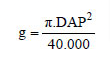

Ao se medir a área seccional de várias árvores em uma mesma área, é possível estimar o volume de madeira e a biomassa da floresta, bem como avaliar a produtividade e o potencial de produção de madeira da região. Além disso, o cálculo da área seccional é importante para entender a estrutura da floresta e a composição das espécies arbóreas presentes na área de estudo, o que é uma informação essencial para a análise fitossociológica. A partir da área seccional e de outras medidas, como a densidade, a frequência e a dominância, é possível obter informações sobre a distribuição e abundância das espécies na área de estudo, bem como sobre a diversidade e a equitabilidade da comunidade vegetal.

In [34]:
# Criação do campo 'area_seccional' e inserção ao lado da coluna 'dap':
data.insert(12, 'seccional', ((data['dap']**2)*pi/40000))
data.head()

,n_arv,parcela,placa,familia,especie,especie_sem_autor,nome_comum,habito,ameaca_flora_brasileira,endemismo,cap,dap,seccional,ht,coord_x,coord_y
0,1,1,2526,Fabaceae,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,ENE,19.0,6.047888,0.002873,5.5,729754.298,6959150.263
1,2,1,2512,Fabaceae,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,ENE,17.0,5.411268,0.002300,6.0,729754.298,6959150.263
2,3,1,2513,Fabaceae,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,ENE,16.0,5.092958,0.002037,7.0,729754.298,6959150.263
3,4,1,2514,Apocynaceae,Tabernaemontana catharinensis A.DC.,Tabernaemontana catharinensis,Cata-vento,Árvore,NE,ENE,13.5,4.297183,0.001450,4.0,729754.298,6959150.263
4,5,1,2515,Fabaceae,Mimosa bimucronata (DC.) Kuntze,Mimosa bimucronata,Maricá,Arbusto; Árvore,NE,ENE,28.0,8.912677,0.006239,4.5,729754.298,6959150.263


Agora pode-se proceder com o cálculo do volume de madeira de cada árvore.
Para tal, será utilizada neste notebook a técnica do Fator de Forma (Ff), amplamente utilizada para florestas Nativas no Brasil.

Para se calcular o volume do
cilindro e obter a sua área seccional basta utilizar
a altura comercial (Hc
) e o diâmetro com casca
tomado a 1,30 metro de altura na árvore (DAP).
Assim o volume é calculado como: Vcilindro =
[(PI x DAP2)/40000] x Hc
, sendo o DAP tomado
em centímetros. O fator de forma consiste em um índice que atenua a cilindricidade da árvore, tornando seu volume mais próximo do real. Quanto mais cilíndrica é uma árvore, mais próxima de 1 é seu fator de forma.

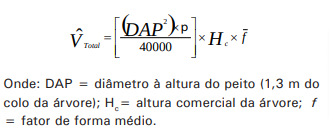

In [35]:
# Demonstração do uso do Fator de Forma de 0,6854, calculado em estudo anterior para área de Floresta similar 
((data['dap']**2)*pi/40000) * data['ht'] * 0.6854

0      0.010829
1      0.009458
2      0.009774
3      0.003976
4      0.019243
         ...   
654    0.013783
655    0.034318
656    0.015752
657    0.006452
658    0.017044
Length: 659, dtype: float64

In [36]:
# Criação da coluna 'vol' (volume de madeira), aplicando o fator de forma
ff = 0.6854
data.insert(13, 'vol', (data['seccional'] * data['ht'] * ff))

Cálculo do volume de madeira empilhado de cada árvore (em estéreo):

Este é o volume que corresponde à madeira empilhada (que considera espaços vazios entre as toras de madeira), enquanto o volume anterior se refere ao volume líquido, em m³.

Para isso, utiliza-se um fator de 'cubicação', geralmente entre 1.5 e 2.0

In [37]:
fc = 1.5
data.insert(14, 'vol_st', (data['vol'] * fc))

Criação de um novo dataframe, com o resultado de parâmetros divididos <b>por parcela</b>. 

Também serão criadas as colunas necessárias para os cálculos futuros, e que serão preenchidas com valores deridados dos valores originais do dataset.

In [38]:
unique_parcela = data['parcela'].unique()
data_ua = pd.DataFrame(columns=('parcela', 'soma_dap', 'soma_g', 'soma_vol'))
data_ua['parcela'] = unique_parcela
data_ua.head()

,parcela,soma_dap,soma_g,soma_vol
0,1,NaN,NaN,NaN
1,2,NaN,NaN,NaN
2,3,NaN,NaN,NaN
3,4,NaN,NaN,NaN
4,5,NaN,NaN,NaN


In [39]:
agrupado_dap = data.groupby('parcela')['dap']
agrupado_g = data.groupby('parcela')['seccional']
agrupado_vol = data.groupby('parcela')['vol']
data_ua['soma_dap'] = agrupado_dap.sum().values
data_ua['soma_g'] = agrupado_g.sum().values
data_ua['soma_vol'] = agrupado_vol.sum().values
data_ua.head()

,parcela,soma_dap,soma_g,soma_vol
0,1,65.094372,0.037236,0.136310
1,2,54.749300,0.048017,0.260407
2,3,87.216909,0.073386,0.573953
3,4,44.722539,0.020863,0.071440
4,5,76.553528,0.049865,0.221039


Com os dados tratados e preparados, pode-se trabalhar sobre os primeiros descritores estatísticos, que serão completados mais a frente.

Normalmente os inventários florestais de espécies nativas, os cálculos estatísticos são feitos sobre a variável CAP (dado primário), DAP (dado primário/secundário) ou do volume (dado secundário).

Neste inventário vamos utilizar as três variáveis e fazer a comparação. Porém, será utilizada a variável DAP como referência, pois é a variável cuja maioria dos órgão ambientais orienta a utilização.

In [40]:
# O método .describe pode ser utilizado sobre qualquer variável numérica.
data[['cap','dap', 'vol']].describe()

,cap,dap,vol
count,659.000000,659.000000,659.000000
mean,31.135964,9.910885,0.099420
std,22.162409,7.054514,0.264680
min,10.000000,3.183099,0.001844
25%,17.000000,5.411268,0.008659
50%,23.500000,7.480282,0.021991
75%,37.000000,11.777466,0.070687
max,198.000000,63.025357,3.421248


In [41]:
# Usando o método .describe para os resultados (descritores) por parcela 
data_ua[['soma_g', 'soma_dap', 'soma_vol']].describe()

,soma_g,soma_dap,soma_vol
count,42.000000,42.000000,42.000000
mean,0.182281,155.506505,1.559948
std,0.112689,75.868725,1.266284
min,0.020863,40.902820,0.071440
25%,0.078974,86.978176,0.560153
50%,0.170482,160.109873,1.292032
75%,0.274548,217.047554,2.581831
max,0.424934,315.285942,4.890859


In [42]:
data_ua.head(20)

,parcela,soma_dap,soma_g,soma_vol
0,1,65.094372,0.037236,0.136310
1,2,54.749300,0.048017,0.260407
2,3,87.216909,0.073386,0.573953
3,4,44.722539,0.020863,0.071440
4,5,76.553528,0.049865,0.221039
5,6,104.723953,0.050154,0.187295
6,7,66.526766,0.033721,0.134465
7,8,189.076072,0.319265,2.596856
8,9,70.028175,0.096953,0.822608
9,10,160.109873,0.352556,3.609708


> Fator de correção: População finita ou infinita?

O fator de correção é a diferença estatística entre uma população finita e infinita.

Considera-se como população finita quando (n/N) > 0,02, ou seja, quando a fração amostral é maior do que 2 %. 

O fator de correção de população finita é definido por: N-n / N-1

<b>Se (1-n/N) >= 0,98 (pop. infinita), o fator de correção de população finita é ignorado.</b> 
<b>Se (1-n/N) <= 0,98 (pop. finita), o fator de correção deve ser aplicado (finiteness correction).</b>

Ou seja, quando a população é infinita, pode-se desprezar o fator de correção tanto no cálcula da intensidade amostral, quanto de outras estimativas.

Referência:
SANQUETTA, C.R.; WATZLAWICK, L.F.; DALLA CORTE, A.P.; FERNANDES, L.A.V.; SIQUEIRA, J.D.P. Inventários florestais: Planejamento e execução. 2. ed. Revista e ampliada, Curitiba, 2009.

In [43]:
n/N

0.04468085106382979

In [44]:
pop = 1-n/N
if pop >= 0.98:
    print("A população é considerada INFINITA")
else:
    print("A população é considerada FINITA")
print(pop)

A população é considerada FINITA
0.9553191489361702


### Estimativas Amostrais

Nesta etapa, pode-se obter as demais <b>estimativas amostrais</b> que serão utilizadas neste Inventário Florestal como:
- Média aritmética (avg)
        Medida de tendência central
- Variância amostral (s2)
        Variância das médias das amostras
- Desvio padrão amostral (
        Variação dos dados com relação à média
- Coeficiente de variação (
        Medida de variabilidade relativa: % de variação dos dados
- Variância da média (
        Determinação da precisão da média estimada
- Erro padrão da média
        Precisão da média, em termos lineares (unidades estatísticas)
- t student bicaudal
        Gráfico simétrico: teste bicaudal
- Erro de amostragem absoluto
        Erro na unidade da variável (cap e dap=cm, vol=m3) 
- Erro de amostragem relativo
        Erro da variável em percentual (%)

Será feito o cálculo das estimativas para as três variáveis ('cap', 'dap' e 'vol')

Mesmo que seja possível concluir o processamento dos dados sem calcular todas as estimativas acima, o valor delas é apresentado pois, normalmente, são dados exigidos como <b>obrigatórios</b> pelos órgãos avaliadores (IBAMA ou órgãos ambientais estaduais) dentro de um inventário florestal, como memória de cálculo e para permitir a checagem por pares dos resultados.

In [45]:
# Para checar depois
stats.describe(data_ua['soma_vol'])

DescribeResult(nobs=42, minmax=(0.07144031598703418, 4.890858506693358), mean=1.5599475574253614, variance=1.6034745699047788, skewness=0.7187753828953326, kurtosis=-0.4604654682694176)

In [46]:
# Criação do dataframe
data_est = pd.DataFrame(columns=('variavel', 'media', 'var', 'desvio_p', \
                                 'coef_var', 'var_med', 'erro_p', 't_student', 'erro_abs', 'erro_rel'))
data_est['variavel'] = ('cap', 'dap', 'vol')
data_est.head()

,variavel,media,var,desvio_p,coef_var,var_med,erro_p,t_student,erro_abs,erro_rel
0,cap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,vol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
data_est['media'] = data_ua[['soma_g','soma_dap','soma_vol']].mean().values

In [48]:
data_est['var'] = data_ua[['soma_g','soma_dap','soma_vol']].var().values

In [49]:
data_est['desvio_p'] = data_ua[['soma_g','soma_dap','soma_vol']].std().values

In [50]:
data_est['coef_var'] = stats.variation(data_ua[['soma_g','soma_dap','soma_vol']], ddof=1) * 100

In [51]:
data_est['var_med'] = data_est['var'] / n if pop >= 0.98 else data_est['var'] / n * pop

In [52]:
data_est['erro_p'] = stats.sem(data_ua[['soma_g','soma_dap','soma_vol']])

In [53]:
data_est['t_student'] = t_student

In [54]:
data_est['erro_abs'] = data_est['erro_p'] * data_est['t_student']

In [55]:
data_est['erro_rel'] = data_est['erro_abs'] / data_est['media'] * 100

In [56]:
data_est.head()

,variavel,media,var,desvio_p,coef_var,var_med,erro_p,t_student,erro_abs,erro_rel
0,cap,0.182281,0.012699,0.112689,61.821669,0.000289,0.017388,2.019541,0.035116,19.264988
1,dap,155.506505,5756.063459,75.868725,48.788136,130.925658,11.706798,2.019541,23.642359,15.203453
2,vol,1.559948,1.603475,1.266284,81.174765,0.036472,0.195392,2.019541,0.394602,25.295837


### Intensidade e Suficiência Amostral

O número ideal de unidades amostrais a serem instaladas na floresta depende do grau de variabilidade da população. A intensidade/suficiência amostral são calculadas a partir de um inventário piloto, de um inventário anterior realizado na área, ou com os dados da primeira amostragem realizada na área.

É importante sempre aferir a intensidade amostral com base na precisão, a qual é estabelecida via limite de erro (LE) pré-determinado e probabilidade pré-definida. Geralmente esses valores variam entre 10% e 20% para o limite de erro, e 90% a 98% para a probabilidade.

Para fazer o cálculo da intensidade amostral e do número ideal de parcelas a serem instaladas, deve-se determinar se a população amostrada é <b>finita ou infinita</b>.

O cálculo da intensidade/suficiência amostral muda conforme o processo de amostragem escolhido e é realizado com base no valor tabelado de "t" de Student e do limite de erro (LE) pré-especificado, bem como na <b>variância</b> ou no <b>coeficiente de variação</b>, que são as medidas de <b>heterogeneidade</b> da população florestal avaliada no inventário florestal. O valor "t" é obtido com base nos Graus de Liberdade (gl) e do nível de probabilidade admitido (geralmente, considerando distribuição bicaudal), mediante consulta à Tabela de Distribuição de Student.

Neste projeto, será calculada a suficiência amostral com base na VARIÂNCIA, assim como iniciado no cálculo da Variância da média.


#### A amostragem atingiu o limite de erro esperado?

In [57]:
for i, row in data_est.iterrows():
    if row['erro_rel'] < (LE*100):
        print (f"A variável {row['variavel']} está DENTRO do Limite de Erro esperado \
para o estudo, com um valor de {round(row['erro_rel'],2)}%")
    else:
        print (f"A variável {row['variavel']} NÃO ATINGIU o Limite de Erro esperado \
para o estudo, com um valor de {round(row['erro_rel'],2)}%")
        print (f"\nDeve-se voltar a campo e instalar MAIS PARCELAS para atingir\
 o erro esperado para a variável {row['variavel']}.")

A variável cap está DENTRO do Limite de Erro esperado para o estudo, com um valor de 19.26%
A variável dap está DENTRO do Limite de Erro esperado para o estudo, com um valor de 15.2%
A variável vol NÃO ATINGIU o Limite de Erro esperado para o estudo, com um valor de 25.3%

Deve-se voltar a campo e instalar MAIS PARCELAS para atingir o erro esperado para a variável vol.


Ou seja, se fosse utilizada a variável 'vol' como métrica de referência, seria necessário voltar a campo e instalar mais parcelas. Ao usar as outras duas variáveis, não seria necessário aumentar a intensidade amostral.

Assim, o cálculo abaixo estima a quantidade ideal (mínima) de parcelas para as variáveis 'cap', 'dap' e 'vol'

Em casos de população INFINITA:
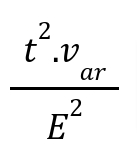

Em casos de população FINITA:
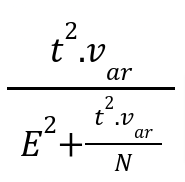

onde:

n = tamanho da amostra;
E = Precisão requerida ou erro admissível em torno da média, em termos absolutos
S² = Variância da característica analisada entre as unidades de amostra;
t = Valor tabelado de Student, a dado nível de significância (alpha) e 'n-1' graus de liberdade (GL)
N = Número total de unidades de amostra na população


Em geral, ao trabalhar com uma <b>população finita</b> em inventários florestais, pode precisar de uma amostra <b>menor</b> para obter estimativas precisas, o que pode ser mais eficiente em termos de custo. Por outro lado, em uma <b>população infinita</b>, você pode precisar de uma amostra <b>maior</b> para alcançar o mesmo nível de precisão.


> Criação de um dataframe auxiliar, para calcular o número de ideal de parcelas para cada variável, e para armazenar o resultado de todos os testes 

In [58]:
data_suf = pd.DataFrame(columns=('variavel', 'erro_rel_requerido', 'erro_abs_requerido', 'n_instaladas', 'n_ideal'))
data_suf['variavel'] = ('cap', 'dap', 'vol')
data_suf['erro_rel_requerido'] = (20)
data_suf['erro_abs_requerido'] = (data_suf['erro_rel_requerido'] * data_est['erro_abs'])/data_est['erro_rel']
data_suf['n_instaladas'] = n
data_suf.head()

,variavel,erro_rel_requerido,erro_abs_requerido,n_instaladas,n_ideal
0,cap,20,0.036456,42,NaN
1,dap,20,31.101301,42,NaN
2,vol,20,0.311990,42,NaN


Para obter o número de unidades amostrais necessário para estimar os parâmetros da população com precisão e confiabilidade fixadas, recomenda-se o recálculo da intensidade amostral, porém utilizando o valor de 't' de Student com base em cada novo grau de liberdade 'gl' obtido, até encontrar um valor constante para a intensidade amostral. Essa estabilidade garante que o valor calculado para a intensidade amostral será o ideal para a população inventariada.

Referência:
SANQUETTA, C.R.; WATZLAWICK, L.F.; DALLA CORTE, A.P.; FERNANDES, L.A.V.; SIQUEIRA, J.D.P. Inventários florestais: Planejamento e execução. 2. ed. Revista e ampliada, Curitiba, 2009.

Para isso, pode ser utilizado um loop 'while' para testar a condição: Repetir o processo até que se obtenham valores estáveis para o número ideal de parcelas, para cada variável. Cada processo é chamado de 'teste_xx', sendo numerado ordenadamente, e gerando novos parâmetros para o cálculo do teste seguinte (Número de Parcelas, Graus de liberdade, t de Student)

Mas o que seriam valores estáveis? Nesta análise adotou-se a seguinte métrica: Quando o valor nominal variar menos de '0.1', considera-o como estável, interrompe-se o loop e adota-se o valor arredondado como o 'n_ideal' (Número ideal de parcelas).

Tanto o 'n_ideal', quanto todos os testes de intensidade amostral podem ser salvos em um dataFrame para futura conferência, e também para apresentação no relatório final.

In [59]:
# Variáveis globais para realização dos testes de suficiência amostral 
gl_teste = 0
t_teste = t_student
teste_num = 1
data_suf[f'teste_{teste_num-1}'] = 0.1
data_suf[f'teste_{teste_num}'] = 1

In [60]:
# Loop While e testes de suficiência amostral
while True:
    if (data_suf[f'teste_{teste_num}'] - data_suf[f'teste_{teste_num-1}']).all() %2 >= .1: 
        if pop >= 0.98:
            data_suf[f'teste_{teste_num}'] = (t_teste**2) * data_est['var'] / (data_suf['erro_abs_requerido']**2)
            gl_teste = round(data_suf[f'teste_{teste_num}'],0) - 1
            data_suf[f'gl_teste_{teste_num}'] = gl_teste
            t_teste = stats.t.ppf(1 - signif / 2, gl_teste)
            data_suf[f't_teste_{teste_num}'] = t_teste
            data_suf[f'teste_{teste_num+1}'] = data_suf[f'teste_{teste_num-1}']
            teste_num += 1
        else:
            data_suf[f'teste_{teste_num}'] = (t_teste**2) * data_est['var'] / ((data_suf['erro_abs_requerido']**2) + ((t_teste**2) * data_est['var'] / N))
            gl_teste = round(data_suf[f'teste_{teste_num}'],0) - 1
            data_suf[f'gl_teste_{teste_num}'] = gl_teste
            t_teste = stats.t.ppf(1 - signif / 2, gl_teste)
            data_suf[f't_teste_{teste_num}'] = t_teste
            data_suf[f'teste_{teste_num+1}'] = data_suf[f'teste_{teste_num-1}']
            teste_num += 1
    else:
        data_suf['n_ideal'] = round(data_suf[f'teste_{teste_num}'],0).astype(int)
        for i, row in data_suf.iterrows():
            print (f"Com base na variável {row['variavel']}, a suficiência amostral é atingida com {row['n_ideal']} PARCELAS.")
        data_suf.head()    
        break

Com base na variável cap, a suficiência amostral é atingida com 38 PARCELAS.
Com base na variável dap, a suficiência amostral é atingida com 25 PARCELAS.
Com base na variável vol, a suficiência amostral é atingida com 62 PARCELAS.


In [61]:
# Resumo do teste de suficiência amostral
data_suf.head()

,variavel,erro_rel_requerido,erro_abs_requerido,n_instaladas,n_ideal,teste_0,teste_1,gl_teste_1,t_teste_1,teste_2,gl_teste_2,t_teste_2,teste_3,gl_teste_3,t_teste_3,teste_4,gl_teste_4,t_teste_4,teste_5
0,cap,20,0.036456,42,38,0.1,37.418417,36.0,2.028094,37.723287,37.0,2.026192,37.655413,37.0,2.026192,37.655413,37.0,2.026192,37.655413
1,dap,20,31.101301,42,25,0.1,23.659354,23.0,2.068658,24.793450,24.0,2.063899,24.682496,24.0,2.063899,24.682496,24.0,2.063899,24.682496
2,vol,20,0.311990,42,62,0.1,62.705411,62.0,1.998972,61.517749,61.0,1.999624,61.555262,61.0,1.999624,61.555262,61.0,1.999624,61.555262


In [69]:
# Ou seja...
for i, row in data_suf.iterrows():
    if row['n_instaladas'] < row['n_ideal']:
        print (f"É necessário instalar mais {row['n_ideal'] - row['n_instaladas']} parcelas para atingir o \
erro máximo admitido para a variável {row['variavel']}.")

É necessário instalar mais 20 parcelas para atingir o erro máximo admitido para a variável vol.


### Intervalo de Confiança (IC)

O intervalo de confiança determina os limites <b>superior</b> e <b>inferior</b>, dentro do qual se espera encontrar, probabilisticamente, o valor REAL da variável de interesse em termos de sua média.

As populações florestais que tem distribuição similar à normal, tendem a ter Intervalo de Confiança com <b>menor</b> amplitude, se for considerado um desvio padrão para mais e para menos em relação à média. Da mesma forma, o Intervalo de Confiança terá um intervalo maior se forem considerados 2 ou 3 desvios padrão.

O intervalo de confiança para a população total é obtido através da multiplicação da média e do erro de amostragem com o número total de parcelas da população (N), expandindo-os assim para toda a população.


#### ICs e autorizações de corte

As licenças e autorizações de corte emitidas por órgãos ambientais no Brasil NÂO CONSIDERARAM O INTERVALO DE CONFIANÇA no volume de madeira autorizado/estimado para ser cortado. Ou seja, estas licenças autorizam somente o corte de valores determinados (ou fixos) de volume de madeira para cada espécie encontrada/estimada na área de corte.

Neste contexto, a apresentação do intervalo de confiança dentro do relatório de inventário florestal é indispensável para:
- Escolha do volume ideal de madeira a ser requerido corte no orgão ambiental, podendo ser, principalmente, ou a média ou o limite superior, dependendo de cada caso.
- Trazer maior segurança técnica e jurídica ao inventário florestal, aos volumes de madeira estimados e encontrados e ao pedido de autorização de corte de vegetação.
- Estimar a faixa onde se encontra o VOLUME REAL a ser extraído na área, dada a probabilidade e o erro adotados para o estudo.
- Facilitar o acompanhamento das atividades de corte de vegetação, permitindo identificar se o corte está sendo feito de forma eficiente, e se está sendo extraido o volume esperado de madeira para a área;
- Como valores de referência, o IC permite comparações, adequações e estimativas durante a etapa de cubagem da madeira (etapa este onde são medidas todas as pilhas e leiras de madeira extraídas, e quantificadas para alimentação dos sistemas de controle, carregamento de caminhões e emissão de guias de transporte). 

In [70]:
# IC pode ser calculado por parcela, por hectare, e para a população:

# Por parcela
ic_parcela = pd.DataFrame(columns=('variavel', 'limite_inferior', 'media', 'limite_superior'))
ic_parcela['variavel'] = ('cap', 'dap', 'vol')
ic_parcela['limite_inferior'] = data_est['media'] - data_est['erro_abs']
ic_parcela['media'] = data_est['media']
ic_parcela['limite_superior'] = data_est['media'] + data_est['erro_abs']
ic_parcela.head()

,variavel,limite_inferior,media,limite_superior
0,cap,0.147165,0.182281,0.217398
1,dap,131.864146,155.506505,179.148865
2,vol,1.165346,1.559948,1.954549


In [71]:
# Por hectare
ic_hectare = pd.DataFrame(columns=('variavel', 'limite_inferior', 'media', 'limite_superior'))
ic_hectare['variavel'] = ('cap', 'dap', 'vol')
ic_hectare['limite_inferior'] = ic_parcela['limite_inferior'] / a
ic_hectare['media'] = ic_parcela['media'] / a
ic_hectare['limite_superior'] = ic_parcela['limite_superior'] / a
ic_hectare.head()

,variavel,limite_inferior,media,limite_superior
0,cap,14.716479,18.228126,21.739772
1,dap,13186.414646,15550.650549,17914.886452
2,vol,116.534576,155.994756,195.454936


In [72]:
# Para a população
ic_pop = pd.DataFrame(columns=('variavel', 'limite_inferior', 'media', 'limite_superior'))
ic_pop['variavel'] = ('cap', 'dap', 'vol')
ic_pop['limite_inferior'] = ic_parcela['limite_inferior'] * A/a
ic_pop['media'] = ic_parcela['media'] * A/a
ic_pop['limite_superior'] = ic_parcela['limite_superior'] * A/a
ic_pop.head()

,variavel,limite_inferior,media,limite_superior
0,cap,138.334905,171.344380,204.353855
1,dap,123952.297675,146176.115162,168399.932649
2,vol,1095.425014,1466.350704,1837.276394


In [ ]:
# NEXT 
# Geração de gráficos para os intervalor de confiança, distribuição dos parâmetros por parcela, para a população, etc...
# Determinação do estágio sucessional a partir de dados quantitativos
# https://youtu.be/99fP_gadHVE?si=4HiRqspW0VfZEeTg

## FITOSSOCIOLOGIA

A fitossociologia é uma disciplina da ecologia que se dedica ao estudo das comunidades vegetais. Na fitossociologia de florestas nativas, o objetivo é caracterizar a composição florística e estrutura da vegetação em determinada área. 

Para uma boa análise fitossociológica são necessários parâmetros qualitativos e quantitativos. Os parâmetros qualitativos referem-se à identificação das espécies presentes na área de estudo, o que é feito por meio de inventários florísticos. Já os parâmetros quantitativos referem-se à frequência, densidade, dominância e valor de importância das espécies. 

A frequência é a proporção de parcelas amostrais em que a espécie ocorre, enquanto a densidade é o número de indivíduos por parcela. A dominância é a contribuição relativa de cada espécie para a área basal da comunidade, enquanto o valor de importância é a soma ponderada dos três parâmetros anteriores. 

Além desses parâmetros, outros fatores podem ser considerados na análise fitossociológica, como a altura e o diâmetro das árvores, a distribuição de classes de tamanho, a diversidade de espécies e a similaridade entre áreas de estudo. 

A partir da análise fitossociológica é possível avaliar a estrutura e dinâmica das comunidades vegetais, identificar espécies indicadoras de perturbação ambiental, planejar ações de manejo e conservação e gerar informações para estudos de biogeografia e ecologia de comunidades.

In [ ]:
data.especie.value_counts()

In [ ]:
data.familia.value_counts()

In [ ]:
# Analisando o resumo de parâmetros do dataset podemos ter um resultado geral da área avaliada
data.describe()

In [ ]:
data.parcela.value_counts()

In [ ]:
# Next steps:

# Detalhar no início os objetivos principais, e detalhar como será quebrado o problema para chegar à solução.
# Gerar uma planilha padrão sinfalor em csv, com base no padrão do IBAMA (Padrão nacional)
# usar gpt para otimizar linhas. por exemplo. loop for
# Inserir as referências
# Based on standard sheet(???)

